# Project 2 

This project is...

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from sklearn.metrics import roc_curve, auc
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

In [33]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1cr65P3ciL2tD4W4KOCTz4Ik67iD52S_DKHXypqgta2o/export?format=csv')

,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


reassign the names of the columns to change lengthy survey question titles to short variable names to simplify later analysis

In [44]:
data.columns = ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments' ]
data.head(1)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN


In [43]:
rows = len(data.index)
print ('Number of rows of rows in the table: ', rows)

Number of rows of rows in the table:  1259


Variables: 

+ **Timestamp**
+ **Age**
+ **Gender**
+ **Country**
+ **state**: If you live in the United States, which state or territory do you live in?
+ **self_employed**: Are you self-employed?
+ **family_history**: Do you have a family history of mental illness?
+ **treatment**: Have you sought treatment for a mental health condition?
+ **work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?
+ **no_employees**: How many employees does your company or organization have?
+ **remote_work**: Do you work remotely (outside of an office) at least 50% of the time?
+ **tech_company**: Is your employer primarily a tech company/organization?
+ **benefits**: Does your employer provide mental health benefits?
+ **care_options**: Do you know the options for mental health care your employer provides?
+ **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?
+ **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?
+ **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
+ **leave**: How easy is it for you to take medical leave for a mental health condition?
+ **mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?
+ **phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?
+ **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
+ **supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?
+ **mental_health_interview:** Would you bring up a mental health issue with a potential employer in an interview?
+ **phys_health_interview:** Would you bring up a physical health issue with a potential employer in an interview?
+ **mental_vs_physical:** Do you feel that your employer takes mental health as seriously as physical health?
+ **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
+ **comments:** Any additional notes or comments

## 1. Cleaning the Data

First, we will see what types of variables are available with the data set. 

In [39]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

Text(0.5, 1.0, 'Percent Missing by Variable')

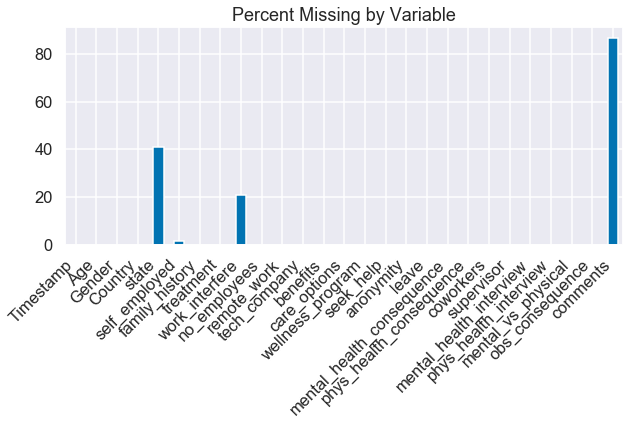

In [46]:
f, ax = plt.subplots(figsize=(10,4))
((data.isnull().sum()/len(data)) * 100).plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Percent Missing by Variable')

It can be noted that the variables with missing variables are: state, self employed, work interfere, and comments. There is missing state data because not all of the individuals who took the survey live in the U.S. 

Moreover, the reason why there since there is so much data missing in comments, and that information is not necessary for my data analysis, we can get rid of that variable. 

In [21]:
data.drop('comments', axis=1, inplace = True)

In [23]:
data.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [28]:
print((data.isnull().sum()))

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64


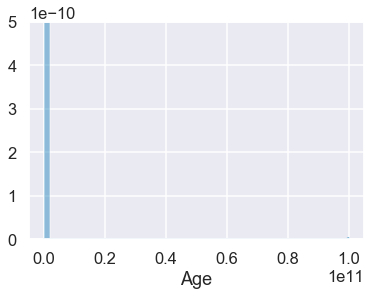

In [54]:
sns.distplot(data['Age'])

Male,male,M,m
Female,female,F,f